# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Step 1: Import and Describe Data 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
telecom = pd.read_csv('D:Machine Learning\Telecom Churn Case Study\\telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# import data dictonary
dictonary = pd.read_excel("D:Machine Learning\Telecom Churn Case Study\\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
dictonary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
telecom.shape

(99999, 226)

In [5]:
# data information
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# data describe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Step 2: Data Cleaning

1. Drop Unnecessary columns
2. Imputing Meaningfull missing values
3. Drop remaining columns with high null percentage
4. Impute missing values
5. Filter High Value Customers
6. Remove September Data
7. Outliers treatment

In [7]:
# Check for Unique values
unique = telecom.nunique()
unique = pd.DataFrame(unique)
unique.columns = ['Count']
unique.sort_values(by='Count',ascending=True)

,Count
std_ic_t2o_mou_6,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_9,1
std_ic_t2o_mou_8,1
std_og_t2c_mou_7,1
std_ic_t2o_mou_7,1
last_date_of_month_9,1
std_og_t2c_mou_6,1
last_date_of_month_7,1


In [8]:
# extracting the columns which have exactly two value
unique.loc[unique.Count == 2]

,Count
night_pck_user_6,2
night_pck_user_7,2
night_pck_user_8,2
night_pck_user_9,2
fb_user_6,2
fb_user_7,2
fb_user_8,2
fb_user_9,2


In [9]:
# Following variables are binary categorical variables. 
categorical_data = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
                    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
telecom[categorical_data] = telecom[categorical_data].astype('object')

### 1. Drop unnecessary columns which are not required for our model

In [10]:
# Drop the following columns as they are not required. 
unnecessary_columns = ['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
                       'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                       'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
telecom.drop(unnecessary_columns, axis=1, inplace=True)

### 2. Handling Missing Values 

Checking null values

In [11]:
# column-wise null %
round((telecom.isnull().sum()/len(telecom))*100,2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

#### We can see more then **74%** values for **recharge** related data are missing.

#### Binary columns with high null values


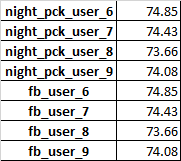

#### Continous columns with high null values


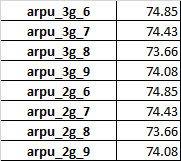

### 3. Checking for meaningfull missing values and impute them with `0`

***` 'total_rech_data_6', 'total_rech_data_7',  'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 
'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 
'av_rech_amt_data_7' ,'av_rech_amt_data_8', 'av_rech_amt_data_9'`***

In [12]:
meaning_missing =['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                  'av_rech_amt_data_6', 'av_rech_amt_data_7' ,'av_rech_amt_data_8', 'av_rech_amt_data_9']
for i in meaning_missing:
    telecom[i] = telecom[i].fillna(0)

# againg checking the null values
round((telecom.isnull().sum()/len(telecom))*100,2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

###### Columns with more than `60%` null values

In [13]:
null = round((telecom.isnull().sum()/len(telecom))*100,2)
null = pd.DataFrame(null)
null.columns = ['Null_Percentage']
null  = null.loc[null.Null_Percentage>60]
null

,Null_Percentage
arpu_3g_6,74.85
arpu_3g_7,74.43
arpu_3g_8,73.66
arpu_3g_9,74.08
arpu_2g_6,74.85
arpu_2g_7,74.43
arpu_2g_8,73.66
arpu_2g_9,74.08
night_pck_user_6,74.85
night_pck_user_7,74.43


### 4. Dropping the columns with high % of null values

In [14]:
high_null=[]
for i in null.index: 
    high_null.append(i)
high_null

['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [15]:
telecom.shape

(99999, 212)

In [16]:
telecom.drop(high_null, axis=1, inplace=True)
telecom.shape

(99999, 196)

In [17]:
# againg checking the null values
round((telecom.isnull().sum()/len(telecom))*100,2)

loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_6      3.94
loc_og_t2c_mou_7      3.86
l

In [18]:
# extracting the columns which have exactly one value
unique = telecom.nunique()
unique = pd.DataFrame(unique)
unique.columns = ['Count']
unique.loc[unique.Count == 1]

,Count
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_6,1
std_ic_t2o_mou_7,1
std_ic_t2o_mou_8,1


####  Here we can see that; `'loc_og_t2o_mou' ,'std_og_t2o_mou' ,'loc_ic_t2o_mou' ,'std_og_t2c_mou_6' ,'std_og_t2c_mou_7' ,'std_og_t2c_mou_8' ,'std_og_t2c_mou_9' ,'std_ic_t2o_mou_6' ,'std_ic_t2o_mou_7' ,'std_ic_t2o_mou_8' ,'std_ic_t2o_mou_9'` columns have only single value, so we should drop these columns.

In [19]:
telecom.shape

(99999, 196)

In [20]:
single_value = ['loc_og_t2o_mou' ,'std_og_t2o_mou' ,'loc_ic_t2o_mou' ,'std_og_t2c_mou_6' ,'std_og_t2c_mou_7' ,
                'std_og_t2c_mou_8' ,'std_og_t2c_mou_9' ,'std_ic_t2o_mou_6' ,'std_ic_t2o_mou_7' ,'std_ic_t2o_mou_8' ,
                'std_ic_t2o_mou_9' ]

telecom.drop(single_value, axis=1, inplace=True)
telecom.shape

(99999, 185)

### 5. Missing value imputation & Outliers treatment 

In [21]:
datatypes = telecom.dtypes
categorical_data = list(datatypes[datatypes == 'object'].index)
categorical_data

[]

`So, there are no categorical columns left except our target column in our data set`

### Missing value imputation

In [22]:
numerical_data = list(datatypes[datatypes != 'object'].index)
numerical_data

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [23]:
quantile = pd.DataFrame(telecom.quantile([0.01,0.05,0.1,0.5,0.85,0.9,0.95,0.99,1.0]).T)
quantile

,0.01,0.05,0.10,0.50,0.85,0.90,0.95,0.99,1.00
arpu_6,0.0,1.50,31.6472,197.704,507.2315,620.0754,829.4882,1410.79254,27731.088
arpu_7,0.0,0.75,29.3558,191.640,501.3891,617.2520,828.3572,1428.68588,35145.834
arpu_8,0.0,0.00,18.0542,192.080,506.0291,618.1604,833.3033,1455.53996,33543.624
arpu_9,0.0,0.00,0.0900,176.849,489.2217,601.5370,805.1072,1402.44566,38805.617
onnet_mou_6,0.0,0.00,0.2500,34.310,223.7055,344.1020,612.4075,1431.76050,7376.710
onnet_mou_7,0.0,0.00,0.1100,32.330,224.2815,348.0350,624.8355,1478.53330,8157.780
onnet_mou_8,0.0,0.00,0.0100,32.360,223.9900,345.0300,620.6900,1480.33400,10752.560
onnet_mou_9,0.0,0.00,0.0000,29.840,219.1805,342.8900,617.2325,1445.76640,10427.460
offnet_mou_6,0.0,0.76,7.2400,96.310,357.2570,477.3250,727.8790,1539.53580,8362.360
offnet_mou_7,0.0,0.61,6.4400,91.735,357.6960,480.4310,744.2250,1549.37950,9667.130


#### Note: ` We can observe a fluctuation of data at below 5% QUARTILE and above 99% QUARTILE, these are the extreme data or ouliers, we should remove these data.`

#### Note: `In our data we can observe that there exist some outliers, so we will replace the missing data with the MEDIAN`

In [24]:
for i in numerical_data: 
    telecom[i].fillna(telecom[i].median(), inplace = True)
round((telecom.isnull().sum()/len(telecom)) * 100, 2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

### 5. Filter high-value customers

In [25]:
telecom['good_phase_recharge'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7']) / 2

#### Filtering the top 70 %ile customers

In [26]:
seventy_percentile = int(telecom['good_phase_recharge'].quantile(.70))
telecom = telecom[(telecom['good_phase_recharge']> seventy_percentile)]
telecom.shape

(30011, 186)

In [27]:
seventy_percentile

368

In [28]:
print('nearly',round((30011/99999)*100),'% of the total revenue belongs to the top 70 percentile customers')

nearly 30 % of the total revenue belongs to the top 70 percentile customers


## Creating the churn column

In [29]:
# cretaing the churn column
def is_churned(x):
    if ((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) & (x.vol_2g_mb_9 == 0) & (x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
telecom['churn'] = telecom.apply(is_churned, axis=1)

In [30]:
telecom['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

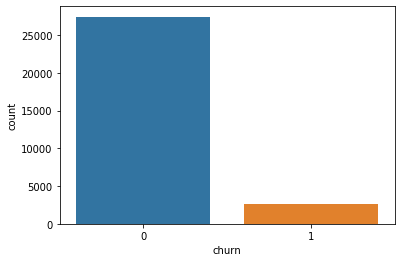

In [31]:
sns.countplot(x='churn', data=telecom)

#### NOTE: ` Here we can observe that there is a huge class imbalance, we have to take care of it `

In [32]:
len(telecom['churn'])

30011

### 6. Drop all columns corresponding to the churn phase, i.e. month 9

In [33]:
churn_month_columns =  telecom.columns[telecom.columns.str.contains('_9')]
churn_month_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [34]:
telecom.shape

(30011, 187)

In [35]:
telecom.drop(churn_month_columns, axis=1, inplace=True)
telecom.shape

(30011, 142)

### 7.  Outliers treatment 

In [36]:
datatypes = telecom.drop('churn',1).dtypes
numerical_data = list(datatypes[datatypes != 'object'].index)
numerical_data

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [37]:
Q1 = telecom.quantile(0.05)
Q3 = telecom.quantile(0.99)
IQR = Q3 - Q1

telecom1 = telecom[~((telecom < (Q1 - 1.5 * IQR)) | (telecom > (Q3 + 1.5 * IQR))).any(axis=1)]
telecom1.shape

(27448, 142)

In [38]:
telecom1['churn'].value_counts()

0    25077
1     2371
Name: churn, dtype: int64

In [39]:
quantile = pd.DataFrame(telecom1.quantile([0.01,0.05,0.1,0.5,0.85,0.9,0.95,0.99,1.0]).T)
quantile

,0.01,0.05,0.10,0.50,0.85,0.90,0.95,0.99,1.00
arpu_6,19.20820,202.43575,269.3545,487.094,824.82220,944.1430,1158.15610,1709.70501,4364.980
arpu_7,27.27188,211.47555,271.3573,484.445,822.01080,940.2289,1156.28145,1668.40365,4311.524
arpu_8,0.00000,20.30250,130.0007,442.502,800.11015,921.1533,1162.59185,1727.54804,4822.844
onnet_mou_6,0.00000,4.21700,12.9470,126.825,587.87900,788.8040,1130.69350,2017.75820,5012.190
onnet_mou_7,0.00000,4.08000,12.2600,125.935,604.57400,807.0930,1163.68100,2041.92380,4730.640
onnet_mou_8,0.00000,1.06000,7.1900,99.440,515.95850,710.2850,1087.04450,2000.43280,4789.980
offnet_mou_6,1.09470,28.63000,59.2180,280.580,719.48750,896.0900,1238.62950,2179.90380,5081.010
offnet_mou_7,1.30000,28.85400,59.8040,280.385,740.82600,917.6790,1247.10300,2231.59790,5260.390
offnet_mou_8,0.00000,10.10400,34.7450,237.830,663.10650,831.6710,1153.28950,2059.95570,5184.110
roam_ic_mou_6,0.00000,0.00000,0.0000,0.000,10.88950,30.6830,84.67050,287.86260,870.240


# Step 3: EDA

In [40]:
telecom1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.

In [41]:
telecom1.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,27448.0,560.192872,320.258874,-810.661,361.19875,487.094,682.59250,4364.980
arpu_7,27448.0,558.441316,316.861656,-897.035,361.11075,484.445,678.44625,4311.524
arpu_8,27448.0,502.921421,350.634989,-345.129,284.58675,442.502,647.39950,4822.844
onnet_mou_6,27448.0,288.873538,419.637301,0.000,42.11000,126.825,353.86000,5012.190
onnet_mou_7,27448.0,294.400910,428.188639,0.000,41.69000,125.935,358.91750,4730.640
onnet_mou_8,27448.0,258.155439,412.263876,0.000,32.36000,99.440,296.24500,4789.980
offnet_mou_6,27448.0,409.389782,438.119021,0.000,137.34000,280.580,517.61500,5081.010
offnet_mou_7,27448.0,413.998719,448.095744,0.000,135.48000,280.385,524.88000,5260.390
offnet_mou_8,27448.0,365.472002,426.384547,0.000,93.99000,237.830,473.67250,5184.110
roam_ic_mou_6,27448.0,14.327290,55.080429,0.000,0.00000,0.000,0.00000,870.240


#### Bivariate Analysis

In [42]:
# Function to display box charts for Month 6, 7, 8
def bivariate_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom1
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.legend(loc="best")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.legend(loc="best")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.legend(loc="best")
    plt.show()


#### Univariate Analysis

In [43]:
def univariate_box_plot(attribute):
    plt.figure(figsize=(20,16))
    df = telecom1
    plt.subplot(2,3,1)
    sns.boxplot(telecom1[attribute+"_6"])
    plt.subplot(2,3,2)
    sns.boxplot(telecom1[attribute+"_7"])
    plt.subplot(2,3,3)
    sns.boxplot(telecom1[attribute+"_8"])
    plt.show()

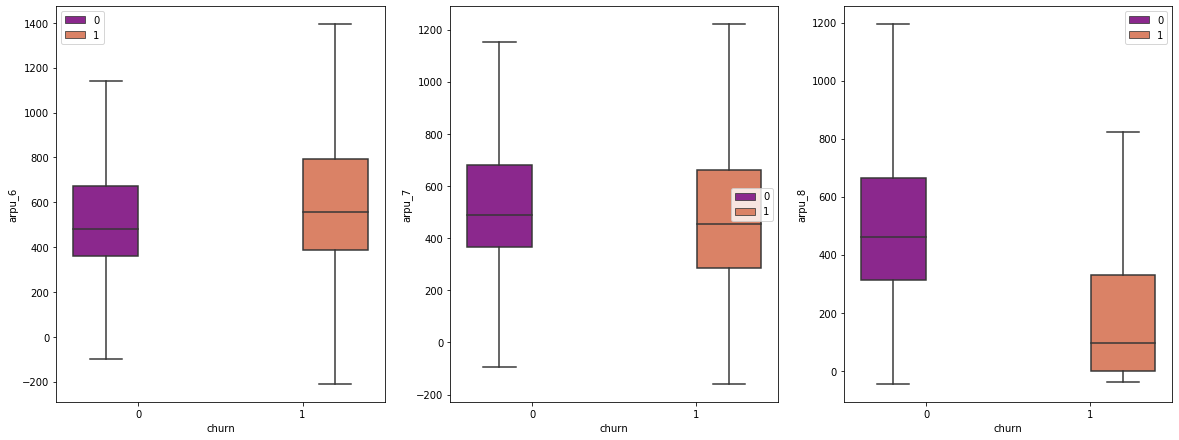

In [44]:
bivariate_box_chart('arpu')

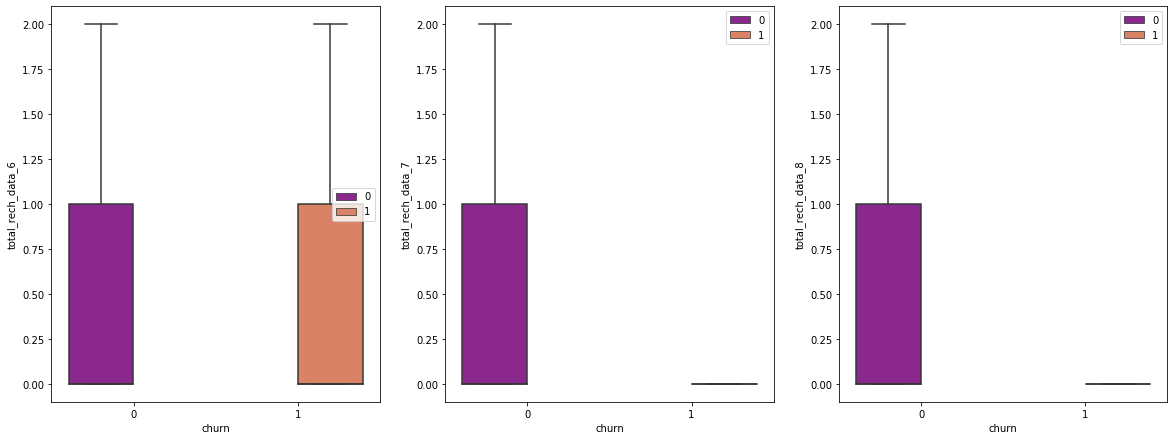

In [45]:
bivariate_box_chart('total_rech_data')

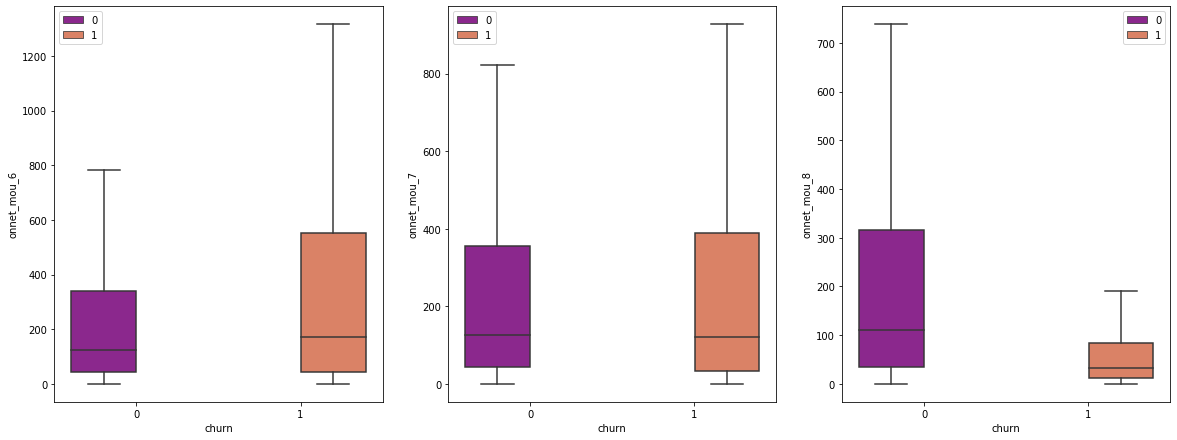

In [46]:
bivariate_box_chart('onnet_mou')

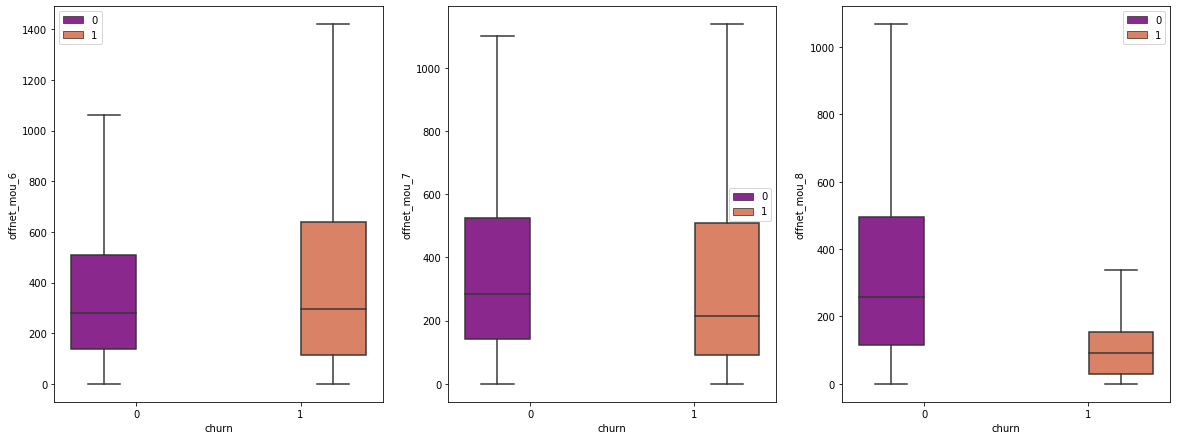

In [47]:
bivariate_box_chart('offnet_mou')

In [48]:
n = (len(numerical_data)//3)+1
n

48

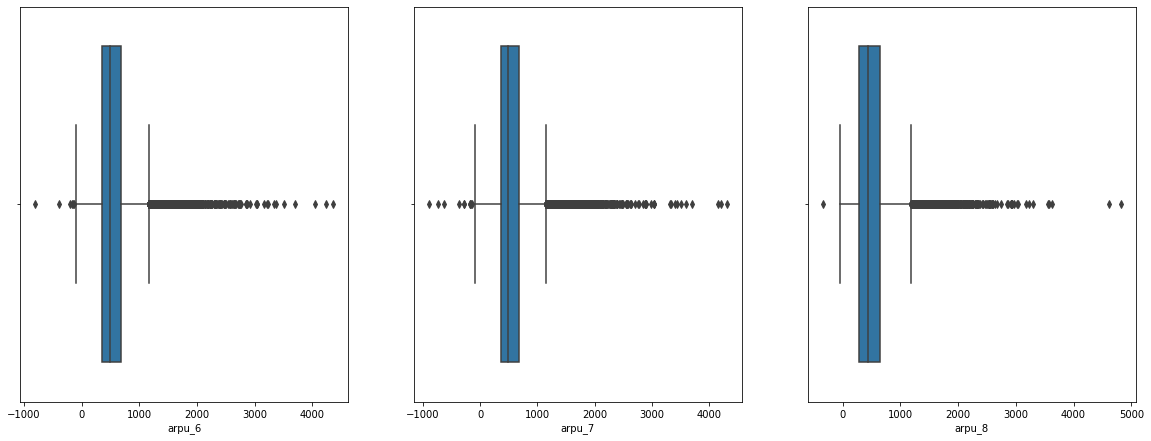

In [49]:
univariate_box_plot('arpu')

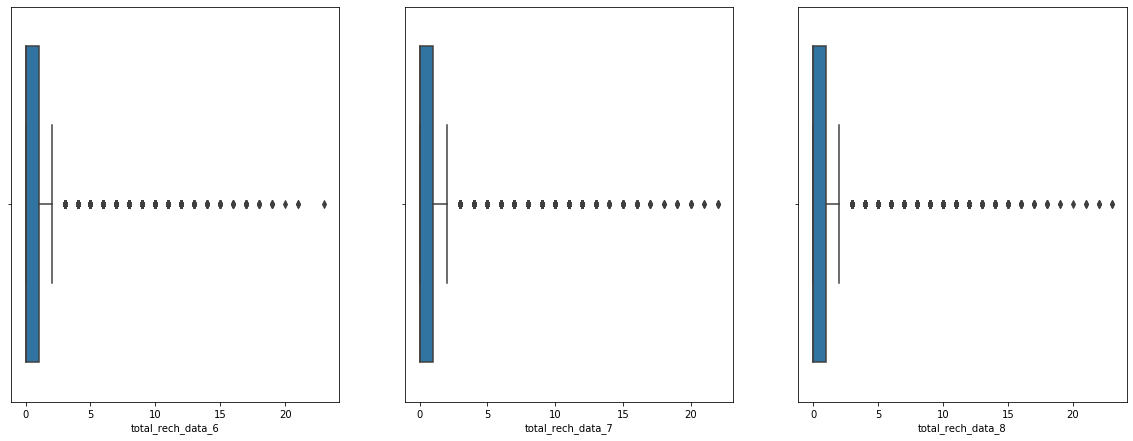

In [50]:
univariate_box_plot('total_rech_data')

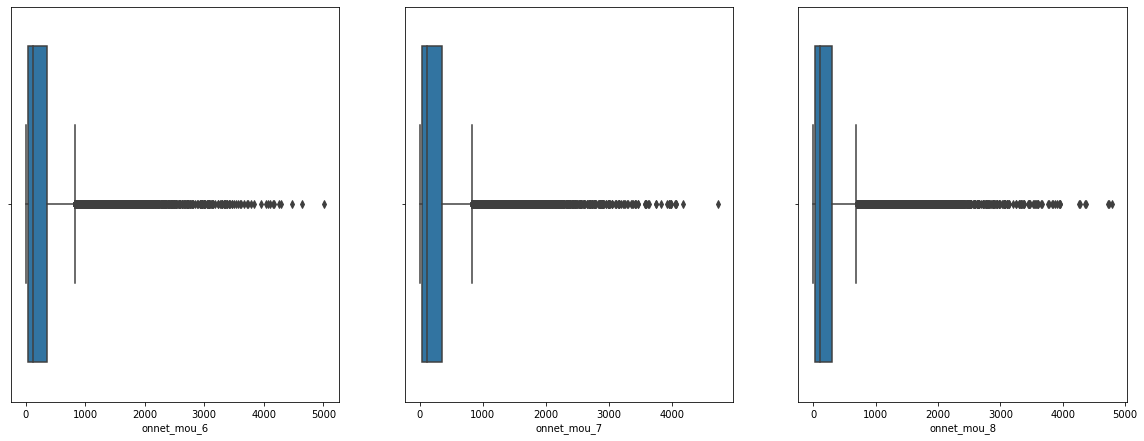

In [51]:
univariate_box_plot('onnet_mou')

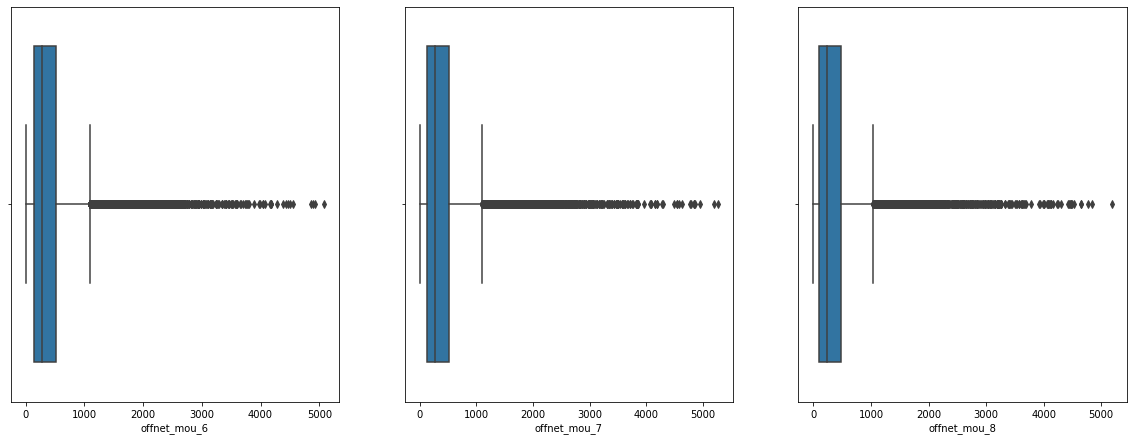

In [52]:
univariate_box_plot('offnet_mou')

# Step 4.  Data Preparation 
1. Data Scaling
2. Train Test split
3. Take care of class imblance

In [53]:
data = telecom1.copy()

In [54]:
data.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.

### 1. Data Scaling

`It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.`

In [55]:
# Instantiate a StandardScaler Object
scaler = StandardScaler()
data[numerical_data] = scaler.fit_transform(data[numerical_data])
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge,churn
7,1.589328,2.497693,7.610784,-0.550565,-0.559859,-0.499363,0.100523,0.341811,-0.092786,0.034545,0.524578,0.484718,-0.019779,-0.077455,0.303177,-0.199190,-0.311572,-0.238928,0.559924,1.187304,-0.016516,3.502440,3.049203,3.114230,-0.30047,-0.305574,-0.296578,0.453500,0.811155,0.012992,-0.475651,-0.436261,-0.411059,-0.386683,-0.435914,-0.336681,0.782012,2.992064,2.777189,-0.578251,-0.564056,-0.474675,-0.122233,-0.082528,3.019984,-0.050168,-0.468822,0.057550,-0.355467,0.0,0.0,-0.306112,-0.132717,-0.412564,-0.041360,-0.290116,-0.313289,0.313928,0.332757,-0.151499,4.027394,2.452287,0.812198,0.742391,0.466268,-0.137810,0.736194,-0.025958,0.591985,1.030743,1.546169,1.898699,6.385424,3.989942,2.803400,1.761839,1.610498,1.988176,1.208610,0.964772,0.575883,0.951348,-0.186777,-0.249233,-0.150072,0.207720,0.712710,5.080766,3.858983,4.670935,-0.768636,-0.728043,-0.331372,2.388998,0.333372,7.201146,9.751390,4.088504,10.144598,-0.850000,-0.835672,5.789253,-0.48593,-0.494256,-0.500483,-0.551708,-0.555858,-0.538810,-0.382262,-0.397224,-0.411965,-0.358957,-0.355561,-0.343417,-0.512246,-0.520101,-0.503226,-0.305663,-0.299608,-0.285873,-0.352095,-0.364266,-0.353079,-0.333555,-0.338846,-0.32074,-0.308859,-0.327504,-0.350650,-0.308596,-0.309945,-0.302926,-0.205798,-0.200629,-0.186657,-0.479151,-0.177095,-0.289262,-0.269968,-0.167245,1.629735,1
8,-0.566652,-0.208986,-1.042583,0.297444,0.132255,-0.541109,-0.718379,-0.743981,-0.537065,-0.260121,-0.228552,-0.232148,-0.279797,-0.252046,-0.251004,1.149619,0.724187,-0.407663,-0.420176,-0.481034,-0.525982,-0.389680,-0.395142,-0.383708,-0.30047,-0.305574,1.155354,0.319868,0.046995,-0.606792,-0.189117,-0.163474,-0.383745,-0.478222,-0.488641,-0.266474,-0.211406,-0.211558,-0.208163,-0.458137,-0.449680,-0.438886,-0.122233,-0.123854,-0.109364,-0.426036,-0.468822,0.350277,-0.355467,0.0,0.0,-0.271741,-0.419726,-0.702318,-0.363303,-0.502772,-0.577765,-0.491385,-0.726209,-0.706303,-0.

### 2.Splitting the data into Train and Test Data 

In [56]:
# I specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
df_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge,churn
38425,0.204436,-0.403156,1.183590,-0.086609,-0.160962,-0.228609,-0.519845,-0.637172,-0.617205,-0.185138,-0.228552,0.922451,-0.157126,-0.252046,0.646373,0.458583,0.263906,-0.027267,-0.150344,-0.330892,-0.440858,0.652729,0.270739,-0.136625,-0.300470,-0.305574,-0.296578,0.178685,-0.071705,-0.333187,-0.304613,-0.269478,-0.313818,-0.495822,-0.500560,-0.451048,0.165973,-0.211558,-0.208163,-0.544120,-0.529546,-0.513722,-0.122233,-0.123854,-0.109364,0.481059,0.140009,-0.381148,-0.355467,0.0,0.0,-0.412624,-0.545274,-0.648731,0.139041,0.530156,0.283057,-0.217494,-0.360411,-0.499885,-0.363219,-0.344430,-0.387420,-0.155546,-0.104192,-0.312232,-0.168350,-0.344117,-0.293425,-0.391849,-0.410947,-0.285119,-0.246176,-0.247262,-0.246683,-0.405905,-0.496150,-0.368337,-0.272671,-0.257924,-0.401361,2.271858,-0.186777,-0.249233,-0.212516,-0.228945,-0.209814,0.193762,0.188871,-0.221556,0.459067,0.365268,1.230873,0.025439,-0.295218,1.092569,0.607387,-0.772715,-0.178850,-0.595270,-0.425134,0.058223,2.410695,0.032449,2.192567,1.999890,-0.307557,0.460137,-0.382262,0.193565,2.608068,6.704897,-0.355561,-0.343417,1.584461,-0.375376,0.837704,1.486699,2.097272,1.551137,-0.352095,-0.364266,-0.353079,-0.333555,-0.338846,-0.32074,-0.308859,0.275443,2.726475,1.586336,-0.309945,-0.302926,8.817749,-0.200629,-0.186657,-0.983170,-0.344062,-0.342974,-0.325275,-0.167245,-0.164134,0
47679,0.697624,1.165942,1.765485,0.217183,-0.285793,-0.161369,0.389856,0.876238,1.355698,-0.260121,-0.228552,-0.232148,-0.279797,-0.252046,-0.251004,1.435639,0.365807,0.663517,1.674897,2.674684,3.274816,-0.313880,0.118948,1.598216,-0.237255,-0.305574,-0.296578,1.957293,2.088643,2.737952,-0.408114,-0.447233,-0.435092,-0.509527,-0.495559,-0.449276,1.242923,1.029686,3.817051,-0.611187,-0.633177,-0.555325,-0.122233,-0.123854,-0.109364,-0.402648,-0.461398,-0.443932,-0.355467,0.0,0.0,0.473844,0.464347,0.860960,2.335672,1.551607,0.958647,1.762666,3.419891,3.498581,

In [58]:
df_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge,churn
88412,-0.871179,-0.521004,-1.425501,-0.168324,0.467114,-0.621326,-0.362465,0.076238,-0.857157,-0.196757,-0.228552,-0.232148,-0.270487,-0.252046,-0.251004,-0.468140,-0.479498,-0.483499,-0.745068,-0.742663,-0.756413,-0.389680,-0.395142,-0.383708,-0.300470,-0.305574,-0.296578,-0.802679,-0.809712,-0.809496,0.064287,0.727605,-0.436901,0.104770,0.547008,-0.466623,-0.211406,-0.211558,-0.208163,0.112718,0.866458,-0.607451,-0.122233,-0.123854,-0.109364,-0.426036,-0.456943,-0.452564,-0.355467,0.0,0.0,-0.338354,0.406292,-0.977390,-0.467958,-0.537961,-0.580802,-0.671697,-0.200936,-0.787548,-0.403144,-0.392702,-0.406222,-0.747567,-0.423514,-0.876341,-0.191351,2.141725,-0.352142,0.210811,-0.151933,-0.417542,-0.246176,-0.247262,-0.246683,0.060591,0.762282,-0.496180,-0.694842,-0.196402,-0.946974,-0.435186,1.904786,-0.249233,-0.212516,-0.228945,-0.209814,-0.220505,-0.225193,-0.221556,-0.210589,-0.181387,-1.112494,-0.911114,-0.513300,-1.356037,-0.783493,-0.378562,-1.104400,-0.680180,-0.753564,-0.766507,0.093395,-0.494256,-0.500483,1.240485,-0.555858,-0.53881,-0.382262,-0.397224,-0.411965,1.053813,-0.355561,-0.343417,0.566583,-0.520101,-0.503226,-0.305663,-0.299608,-0.285873,-0.352095,-0.364266,-0.353079,-0.333555,-0.338846,-0.320740,-0.308859,-0.327504,-0.35065,1.586336,-0.309945,-0.302926,-0.205798,-0.200629,-0.186657,-1.102004,-0.344062,-0.342974,-0.325275,-0.167245,-0.856121,1
44491,0.236807,0.275007,-0.031793,0.984455,1.604133,0.719588,-0.249959,-0.610056,-0.583948,-0.260121,-0.228552,-0.232148,-0.279797,-0.252046,-0.251004,-0.363304,-0.320193,-0.469655,-0.683293,-0.713707,-0.719346,-0.323903,-0.395142,-0.383708,-0.207906,-0.202045,-0.296578,-0.698065,-0.700342,-0.776023,1.250242,1.862492,0.985721,0.191555,-0.216632,-0.180083,-0.211406,-0.211558,-0.208163,0.976277,1.106875,0.546224,-0.122233,-0.123854,-0.109364,-0.132859,0.382057,1.794294,3.626200,0.0,0.0,0.559515,0.713568,0.154907,-0.373628,-0.129533,-0.152

In [59]:
y_train = df_train.pop('churn')
X_train = df_train

In [60]:
y_test = df_test.pop('churn')
X_test = df_test

In [61]:
X_train.shape

(19213, 141)

In [62]:
X_test.shape

(8235, 141)

In [63]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge
38425,0.204436,-0.403156,1.183590,-0.086609,-0.160962,-0.228609,-0.519845,-0.637172,-0.617205,-0.185138,-0.228552,0.922451,-0.157126,-0.252046,0.646373,0.458583,0.263906,-0.027267,-0.150344,-0.330892,-0.440858,0.652729,0.270739,-0.136625,-0.300470,-0.305574,-0.296578,0.178685,-0.071705,-0.333187,-0.304613,-0.269478,-0.313818,-0.495822,-0.500560,-0.451048,0.165973,-0.211558,-0.208163,-0.544120,-0.529546,-0.513722,-0.122233,-0.123854,-0.109364,0.481059,0.140009,-0.381148,-0.355467,0.0,0.0,-0.412624,-0.545274,-0.648731,0.139041,0.530156,0.283057,-0.217494,-0.360411,-0.499885,-0.363219,-0.344430,-0.387420,-0.155546,-0.104192,-0.312232,-0.168350,-0.344117,-0.293425,-0.391849,-0.410947,-0.285119,-0.246176,-0.247262,-0.246683,-0.405905,-0.496150,-0.368337,-0.272671,-0.257924,-0.401361,2.271858,-0.186777,-0.249233,-0.212516,-0.228945,-0.209814,0.193762,0.188871,-0.221556,0.459067,0.365268,1.230873,0.025439,-0.295218,1.092569,0.607387,-0.772715,-0.178850,-0.595270,-0.425134,0.058223,2.410695,0.032449,2.192567,1.999890,-0.307557,0.460137,-0.382262,0.193565,2.608068,6.704897,-0.355561,-0.343417,1.584461,-0.375376,0.837704,1.486699,2.097272,1.551137,-0.352095,-0.364266,-0.353079,-0.333555,-0.338846,-0.32074,-0.308859,0.275443,2.726475,1.586336,-0.309945,-0.302926,8.817749,-0.200629,-0.186657,-0.983170,-0.344062,-0.342974,-0.325275,-0.167245,-0.164134
47679,0.697624,1.165942,1.765485,0.217183,-0.285793,-0.161369,0.389856,0.876238,1.355698,-0.260121,-0.228552,-0.232148,-0.279797,-0.252046,-0.251004,1.435639,0.365807,0.663517,1.674897,2.674684,3.274816,-0.313880,0.118948,1.598216,-0.237255,-0.305574,-0.296578,1.957293,2.088643,2.737952,-0.408114,-0.447233,-0.435092,-0.509527,-0.495559,-0.449276,1.242923,1.029686,3.817051,-0.611187,-0.633177,-0.555325,-0.122233,-0.123854,-0.109364,-0.402648,-0.461398,-0.443932,-0.355467,0.0,0.0,0.473844,0.464347,0.860960,2.335672,1.551607,0.958647,1.762666,3.419891,3.498581,0.107141

In [64]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_recharge
88412,-0.871179,-0.521004,-1.425501,-0.168324,0.467114,-0.621326,-0.362465,0.076238,-0.857157,-0.196757,-0.228552,-0.232148,-0.270487,-0.252046,-0.251004,-0.468140,-0.479498,-0.483499,-0.745068,-0.742663,-0.756413,-0.389680,-0.395142,-0.383708,-0.300470,-0.305574,-0.296578,-0.802679,-0.809712,-0.809496,0.064287,0.727605,-0.436901,0.104770,0.547008,-0.466623,-0.211406,-0.211558,-0.208163,0.112718,0.866458,-0.607451,-0.122233,-0.123854,-0.109364,-0.426036,-0.456943,-0.452564,-0.355467,0.0,0.0,-0.338354,0.406292,-0.977390,-0.467958,-0.537961,-0.580802,-0.671697,-0.200936,-0.787548,-0.403144,-0.392702,-0.406222,-0.747567,-0.423514,-0.876341,-0.191351,2.141725,-0.352142,0.210811,-0.151933,-0.417542,-0.246176,-0.247262,-0.246683,0.060591,0.762282,-0.496180,-0.694842,-0.196402,-0.946974,-0.435186,1.904786,-0.249233,-0.212516,-0.228945,-0.209814,-0.220505,-0.225193,-0.221556,-0.210589,-0.181387,-1.112494,-0.911114,-0.513300,-1.356037,-0.783493,-0.378562,-1.104400,-0.680180,-0.753564,-0.766507,0.093395,-0.494256,-0.500483,1.240485,-0.555858,-0.53881,-0.382262,-0.397224,-0.411965,1.053813,-0.355561,-0.343417,0.566583,-0.520101,-0.503226,-0.305663,-0.299608,-0.285873,-0.352095,-0.364266,-0.353079,-0.333555,-0.338846,-0.320740,-0.308859,-0.327504,-0.35065,1.586336,-0.309945,-0.302926,-0.205798,-0.200629,-0.186657,-1.102004,-0.344062,-0.342974,-0.325275,-0.167245,-0.856121
44491,0.236807,0.275007,-0.031793,0.984455,1.604133,0.719588,-0.249959,-0.610056,-0.583948,-0.260121,-0.228552,-0.232148,-0.279797,-0.252046,-0.251004,-0.363304,-0.320193,-0.469655,-0.683293,-0.713707,-0.719346,-0.323903,-0.395142,-0.383708,-0.207906,-0.202045,-0.296578,-0.698065,-0.700342,-0.776023,1.250242,1.862492,0.985721,0.191555,-0.216632,-0.180083,-0.211406,-0.211558,-0.208163,0.976277,1.106875,0.546224,-0.122233,-0.123854,-0.109364,-0.132859,0.382057,1.794294,3.626200,0.0,0.0,0.559515,0.713568,0.154907,-0.373628,-0.129533,-0.152350,-0.6

### 3.Taking care of class imblance

### Checking the `Churn` Probability Score

In [65]:
# churn probality of the whole data
round((sum(data['churn'])/len(data['churn'].index))* 100,2)

8.64

In [66]:
# churn probality of the train data
round((sum(y_train)/len(y_train.index))* 100,2)

8.52

In [67]:
# churn probality of the test data
round((sum(y_test)/len(y_test.index))* 100,2)

8.91

` Here we can observe a huge class imblance`

### Synthetic Minority Oversampling Technique (SMOTE)

In [68]:
# conda install -c conda-forge imbalanced-learn

In [69]:
from imblearn.over_sampling import SMOTE
# cols = X_train.columns

In [70]:
smt = SMOTE(random_state=27)
X_train, y_train = smt.fit_sample(X_train, y_train) 

In [71]:
X_train.shape

(35152, 141)

#### Checking class imbalance in the churn data

In [72]:
imb = (y_train != 0).sum() / (y_train == 0).sum()
imb

1.0

#### So our churn data  or target variable is balanced now. 

# Step 5. Model Building

We will create models without and with PCA
1. Without PCA : 
    - Logistic Regression
    - Decision Tree
    - Random Forests
   
2. With PCA : 
    - Logistic Regression
    - Decision Tree
    - Random Forests

# 1. Without PCA 

## Logistic Regression

I will be using the **GLM function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### Feature Selection through RFE

In [73]:
logreg = LogisticRegression()

In [74]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 77),
 ('arpu_7', True, 1),
 ('arpu_8', False, 14),
 ('onnet_mou_6', False, 37),
 ('onnet_mou_7', False, 18),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 31),
 ('offnet_mou_7', False, 80),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 111),
 ('roam_ic_mou_7', False, 65),
 ('roam_ic_mou_8', False, 122),
 ('roam_og_mou_6', False, 38),
 ('roam_og_mou_7', False, 81),
 ('roam_og_mou_8', False, 25),
 ('loc_og_t2t_mou_6', False, 84),
 ('loc_og_t2t_mou_7', False, 107),
 ('loc_og_t2t_mou_8', False, 22),
 ('loc_og_t2m_mou_6', False, 30),
 ('loc_og_t2m_mou_7', False, 76),
 ('loc_og_t2m_mou_8', False, 23),
 ('loc_og_t2f_mou_6', False, 116),
 ('loc_og_t2f_mou_7', False, 34),
 ('loc_og_t2f_mou_8', False, 89),
 ('loc_og_t2c_mou_6', False, 51),
 ('loc_og_t2c_mou_7', False, 102),
 ('loc_og_t2c_mou_8', False, 50),
 ('loc_og_mou_6', False, 33),
 ('loc_og_mou_7', False, 20),
 ('loc_og_mou_8', False, 21),
 ('std_og_t2t_mou_6', False, 29),
 ('std_og_t2t_mou_7', False, 117)

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'av_rech_amt_data_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

In [78]:
y=X_train.columns[~rfe.support_]
y

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'good_phase_recharge'],
      dtype='object', length=126)

### Assessing the model with StatsModels

In [79]:
# importing statsmodels
import statsmodels.api as sm 

In [80]:
# Creating X_test dataframe with RFE selected variables
X_train_model_1 = X_train[col]

In [81]:
# Adding a constant variable 
X_train_model_1= sm.add_constant(X_train_model_1)

In [82]:
# Logistic regression model
logm1 = sm.GLM(y_train, X_train_model_1, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35152
Model:                            GLM   Df Residuals:                    35136
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12434.
Date:                Tue, 01 Sep 2020   Deviance:                       24868.
Time:                        11:12:18   Pearson chi2:                 8.93e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1307      0.037    -57.662      0.000      -2.203      -2.058
arpu_7                 0.5426      0.022     24.783      0.000       0.500       0.585
onnet_mou_8            2.1078      0.100     21.113      0.000       1.912       2.303
std_og_t2t_mou_8      -2.0226      0.099    -20.464      0.000      -2.216      -1.829
std_og_mou_8           2.8980      0.118     24.478      0.000       2.666       3.130
total_og_mou_8        -3.5764      0.123    -29.048      0.000      -3.818      -3.335
loc_ic_t2m_mou_7       0.5458      0.038     14.300      0.000       0.471       0.621
loc_ic_mou_8          10.1182      0.355     28.501      0.000       9.422      10.814
std_ic_mou_8           3.1206      0.115     27.233      0.000       2.896       3.345
total_ic_mou_8       -12.6662      0.392    -32.280      0.000     -13.435     -11.897
spl_ic_mou_8          -0.6007      0.039    -15.575      0.000      -0.676      -0.525
isd_ic_mou_8           1.5465      0.054     28.742      0.000       1.441       1.652
total_rech_num_8      -0.4497      0.026    -17.579      0.000      -0.500      -0.400
av_rech_amt_data_8    -1.1671      0.034    -34.437      0.000      -1.234      -1.101
aon                   -0.4824      0.022    -22.423      0.000      -0.525      -0.440
sep_vbc_3g            -1.4235      0.139    -10.274      0.000      -1.695      -1.152
======================================================================================
"""

### Checking VIF

In [83]:
# dropping constant
X_train_model_1_new=X_train_model_1.drop('const',1)

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_1_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_1_new.values, i) for i in range(X_train_model_1_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,76.21
6,loc_ic_mou_8,55.52
4,total_og_mou_8,16.09
2,std_og_t2t_mou_8,15.69
1,onnet_mou_8,15.06
3,std_og_mou_8,14.46
7,std_ic_mou_8,5.86
5,loc_ic_t2m_mou_7,2.42
10,isd_ic_mou_8,1.95
11,total_rech_num_8,1.64


#### As the `vif` for `total_ic_mou_8` is high we can drop it

In [85]:
X_train_model_1_new = X_train_model_1_new.drop(['total_ic_mou_8'], axis = 1)

In [86]:
# Adding a constant variable 
X_train_model_2= sm.add_constant(X_train_model_1_new)

In [87]:
# Logistic regression model
logm2 = sm.GLM(y_train, X_train_model_2, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35152
Model:                            GLM   Df Residuals:                    35137
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13652.
Date:                Tue, 01 Sep 2020   Deviance:                       27303.
Time:                        11:12:20   Pearson chi2:                 3.51e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2615      0.038    -60.168      0.000      -2.335      -2.188
arpu_7                 0.4292      0.021     20.815      0.000       0.389       0.470
onnet_mou_8            3.1888      0.109     29.278      0.000       2.975       3.402
std_og_t2t_mou_8      -3.0866      0.107    -28.753      0.000      -3.297      -2.876
std_og_mou_8           4.7167      0.123     38.391      0.000       4.476       4.957
total_og_mou_8        -5.5412      0.128    -43.430      0.000      -5.791      -5.291
loc_ic_t2m_mou_7       0.3866      0.034     11.242      0.000       0.319       0.454
loc_ic_mou_8          -0.8045      0.051    -15.670      0.000      -0.905      -0.704
std_ic_mou_8          -0.5192      0.033    -15.800      0.000      -0.584      -0.455
spl_ic_mou_8          -0.6784      0.040    -17.167      0.000      -0.756      -0.601
isd_ic_mou_8          -0.0529      0.024     -2.162      0.031      -0.101      -0.005
total_rech_num_8      -0.7244      0.027    -26.448      0.000      -0.778      -0.671
av_rech_amt_data_8    -0.9603      0.030    -32.541      0.000      -1.018      -0.902
aon                   -0.5285      0.020    -26.390      0.000      -0.568      -0.489
sep_vbc_3g            -1.6221      0.143    -11.357      0.000      -1.902      -1.342
======================================================================================
"""

### Checking VIF

In [88]:
# dropping constant
X_train_model_2_new=X_train_model_2.drop('const',1)

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_2_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2_new.values, i) for i in range(X_train_model_2_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2t_mou_8,15.55
4,total_og_mou_8,15.41
1,onnet_mou_8,14.92
3,std_og_mou_8,14.07
6,loc_ic_mou_8,3.34
5,loc_ic_t2m_mou_7,2.42
10,total_rech_num_8,1.56
0,arpu_7,1.37
12,aon,1.18
7,std_ic_mou_8,1.17


In [90]:
X_train_model_2_new = X_train_model_2_new.drop(['std_og_t2t_mou_8'], axis = 1)

In [91]:
# Adding a constant variable 
X_train_model_3= sm.add_constant(X_train_model_2_new)

In [92]:
# Logistic regression model
logm3 = sm.GLM(y_train, X_train_model_3, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35152
Model:                            GLM   Df Residuals:                    35138
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14048.
Date:                Tue, 01 Sep 2020   Deviance:                       28096.
Time:                        11:12:22   Pearson chi2:                 1.08e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1659      0.037    -58.481      0.000      -2.238      -2.093
arpu_7                 0.4635      0.020     22.882      0.000       0.424       0.503
onnet_mou_8            0.1580      0.029      5.458      0.000       0.101       0.215
std_og_mou_8           2.7640      0.095     29.062      0.000       2.578       2.950
total_og_mou_8        -3.7189      0.101    -36.851      0.000      -3.917      -3.521
loc_ic_t2m_mou_7       0.2168      0.033      6.597      0.000       0.152       0.281
loc_ic_mou_8          -0.7999      0.052    -15.287      0.000      -0.902      -0.697
std_ic_mou_8          -0.5307      0.033    -16.159      0.000      -0.595      -0.466
spl_ic_mou_8          -0.7004      0.040    -17.680      0.000      -0.778      -0.623
isd_ic_mou_8          -0.0850      0.025     -3.420      0.001      -0.134      -0.036
total_rech_num_8      -0.7068      0.027    -26.659      0.000      -0.759      -0.655
av_rech_amt_data_8    -0.9959      0.030    -33.665      0.000      -1.054      -0.938
aon                   -0.5278      0.020    -27.015      0.000      -0.566      -0.490
sep_vbc_3g            -1.6258      0.142    -11.441      0.000      -1.904      -1.347
======================================================================================
"""

### Checking VIF

In [93]:
# dropping constant
X_train_model_3_new=X_train_model_3.drop('const',1)

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_3_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3_new.values, i) for i in range(X_train_model_3_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,10.34
2,std_og_mou_8,7.78
5,loc_ic_mou_8,3.34
1,onnet_mou_8,2.40
4,loc_ic_t2m_mou_7,2.35
9,total_rech_num_8,1.56
0,arpu_7,1.37
11,aon,1.18
6,std_ic_mou_8,1.17
10,av_rech_amt_data_8,1.14


#### As the `vif` for `total_og_mou_8` is high we can drop it

In [95]:
X_train_model_3_new = X_train_model_3_new.drop(['total_og_mou_8'], axis = 1)

In [96]:
# Adding a constant variable 
X_train_model_4= sm.add_constant(X_train_model_3_new)

In [97]:
# Logistic regression model
logm4 = sm.GLM(y_train, X_train_model_4, family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35152
Model:                            GLM   Df Residuals:                    35139
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14994.
Date:                Tue, 01 Sep 2020   Deviance:                       29987.
Time:                        11:12:23   Pearson chi2:                 8.24e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9430      0.035    -54.881      0.000      -2.012      -1.874
arpu_7                 0.2918      0.018     16.038      0.000       0.256       0.327
onnet_mou_8           -0.0648      0.026     -2.474      0.013      -0.116      -0.013
std_og_mou_8          -0.3983      0.029    -13.556      0.000      -0.456      -0.341
loc_ic_t2m_mou_7       0.2936      0.034      8.747      0.000       0.228       0.359
loc_ic_mou_8          -2.0587      0.049    -42.279      0.000      -2.154      -1.963
std_ic_mou_8          -0.5328      0.033    -16.210      0.000      -0.597      -0.468
spl_ic_mou_8          -0.7282      0.040    -18.201      0.000      -0.807      -0.650
isd_ic_mou_8          -0.1139      0.025     -4.556      0.000      -0.163      -0.065
total_rech_num_8      -0.9129      0.027    -34.326      0.000      -0.965      -0.861
av_rech_amt_data_8    -0.9658      0.030    -32.575      0.000      -1.024      -0.908
aon                   -0.6057      0.019    -32.663      0.000      -0.642      -0.569
sep_vbc_3g            -1.6439      0.143    -11.463      0.000      -1.925      -1.363
======================================================================================
"""

### Checking VIF

In [98]:
# dropping constant
X_train_model_4_new=X_train_model_4.drop('const',1)

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_4_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_4_new.values, i) for i in range(X_train_model_4_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,2.63
2,std_og_mou_8,2.62
3,loc_ic_t2m_mou_7,2.34
1,onnet_mou_8,2.19
8,total_rech_num_8,1.50
0,arpu_7,1.31
5,std_ic_mou_8,1.16
10,aon,1.15
9,av_rech_amt_data_8,1.14
6,spl_ic_mou_8,1.05


## Prediction

In [100]:
y_train_pred = logm4.predict(X_train_model_4).values.reshape(-1)
y_train_pred

array([1.22936855e-01, 7.54323494e-04, 5.60144802e-03, ...,
       5.21665750e-01, 3.03538340e-01, 8.69391969e-01])

In [101]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
# y_train_pred_final['Churn'] = y_train.index
y_train_pred_final.head(20)

,Churn,Churn_Prob
0,0,0.122937
1,0,0.000754
2,0,0.005601
3,0,0.006539
4,1,0.879834
5,0,0.000981
6,0,0.598484
7,0,0.000313
8,0,0.028984
9,0,0.202139


### Plotting the ROC Curve

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
from sklearn import metrics

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

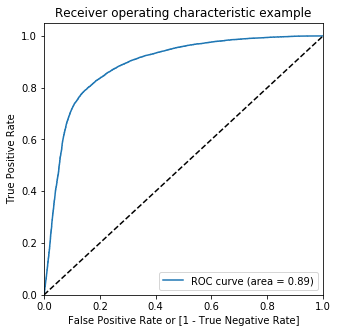

In [105]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122937,1,1,0,0,0,0,0,0,0,0
1,0,0.000754,1,0,0,0,0,0,0,0,0,0
2,0,0.005601,1,0,0,0,0,0,0,0,0,0
3,0,0.006539,1,0,0,0,0,0,0,0,0,0
4,1,0.879834,1,1,1,1,1,1,1,1,1,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.689662  0.975706  0.403619
0.2   0.2  0.741466  0.953687  0.529244
0.3   0.3  0.776115  0.927003  0.625228
0.4   0.4  0.799898  0.896791  0.703004
0.5   0.5  0.814890  0.859354  0.770426
0.6   0.6  0.820465  0.806327  0.834604
0.7   0.7  0.813382  0.733728  0.893036
0.8   0.8  0.731224  0.518946  0.943503
0.9   0.9  0.552657  0.118400  0.986914


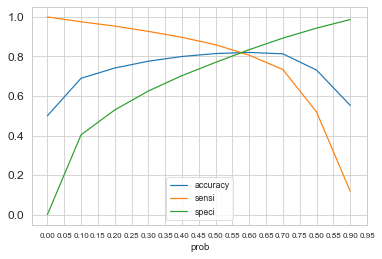

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step = 0.05), size=8)
plt.yticks(size=12)
plt.show()

#### From the curve above, 0.57 (approximately) is the optimum point to take it as a cutoff probability.

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.122937,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000754,1,0,0,0,0,0,0,0,0,0,0
2,0,0.005601,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006539,1,0,0,0,0,0,0,0,0,0,0
4,1,0.879834,1,1,1,1,1,1,1,1,1,0,1


In [110]:
cols = X_train_model_4.drop('const',1).columns
cols

Index(['arpu_7', 'onnet_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_num_8', 'av_rech_amt_data_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

## Checking overall accuracy

In [111]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted).round(2)

0.82

## Metrics beyond simply accuracy

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[14339,  3237],
       [ 3086, 14490]], dtype=int64)

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('True Positive:', TP)
print('True Negetive:', TN)
print('False Positive:', FP)
print('False Negetive:', FN)

True Positive: 14490
True Negetive: 14339
False Positive: 3237
False Negetive: 3086


In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8244196631770596

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8158284023668639

## **Precision and Recall**
### ***Precision***
 
#### TP/(TP+FP)

### ***Recall***
#### TP/(FN+TP)


In [116]:
print('Precision = %0.2f'%(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Precision = 0.82


In [117]:
print('Recall = %0.2f'%(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Recall = 0.82


### Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Churn.head(), y_train_pred_final.Churn_Prob.head()

(0    0
 1    0
 2    0
 3    0
 4    1
 Name: Churn, dtype: int64,
 0    0.122937
 1    0.000754
 2    0.005601
 3    0.006539
 4    0.879834
 Name: Churn_Prob, dtype: float64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

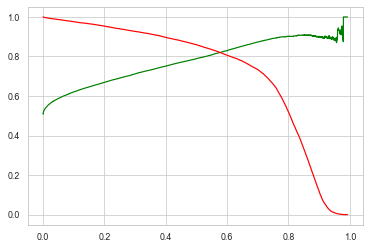

In [121]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

### Checking the Probability Score

In [122]:
probability = round((sum(y_train_pred_final['final_predicted'])/len(y_train_pred_final['final_predicted'].index))* 100,2)
print(probability)

50.43


## Predictions on the Test Set

In [123]:
X_test.shape

(8235, 141)

In [124]:
X_test_df = pd.DataFrame(X_test, columns = cols)

In [125]:
X_test_df.head()

,arpu_7,onnet_mou_8,std_og_mou_8,loc_ic_t2m_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,av_rech_amt_data_8,aon,sep_vbc_3g
88412,-0.521004,-0.621326,-0.607451,-0.200936,-0.876341,-0.496180,-0.249233,-0.209814,-1.112494,-0.503226,-1.102004,-0.167245
44491,0.275007,0.719588,0.546224,-0.494779,-0.415133,-0.108936,-0.249233,-0.209814,1.119284,-0.503226,-0.809017,-0.167245
11260,-1.296256,-0.442481,-0.610970,-0.797552,-0.876341,-0.496180,-0.249233,-0.209814,-0.666139,-0.503226,-0.915558,-0.167245
81123,1.272413,-0.337522,-0.610970,-0.645017,-0.876341,-0.496180,-0.249233,-0.209814,0.114984,1.899525,-0.985219,-0.167245
74955,-0.400315,-0.147955,-0.598486,0.556227,0.638071,-0.496180,-0.249233,0.954803,0.338161,-0.503226,-0.579545,-0.167245


In [126]:
X_test_df.shape

(8235, 12)

In [127]:
X_train.shape

(35152, 141)

In [128]:
X_train_model_4.columns

Index(['const', 'arpu_7', 'onnet_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_num_8', 'av_rech_amt_data_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

In [129]:
X_train_model_4.shape

(35152, 13)

In [130]:
# adding constant
X_test_sm = sm.add_constant(X_test_df)

In [131]:
X_test_sm.shape

(8235, 13)

In [132]:
# making prediction
y_test_pred = logm4.predict(X_test_sm)

In [133]:
y_test_pred[:10]

88412    0.945114
44491    0.283934
11260    0.871473
81123    0.428027
74955    0.139224
87176    0.214885
89296    0.000001
82881    0.892321
83734    0.832326
51217    0.739608
dtype: float64

In [134]:
# Convert y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
88412,0.945114
44491,0.283934
11260,0.871473
81123,0.428027
74955,0.139224


In [135]:
y_test.shape

(8235,)

In [136]:
# Append y_test_df to y_pred_1
y_pred_final = pd.concat((y_test, y_pred_1), axis=1)

In [137]:
y_pred_final.head()

,churn,0
88412,1,0.945114
44491,0,0.283934
11260,0,0.871473
81123,0,0.428027
74955,0,0.139224


In [138]:
# Rename the column
y_pred_final.columns = ['Churn',"Churn_Prob"]
y_pred_final.head()

,Churn,Churn_Prob
88412,1,0.945114
44491,0,0.283934
11260,0,0.871473
81123,0,0.428027
74955,0,0.139224


In [139]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.57 else 0)
y_pred_final.head()

,Churn,Churn_Prob,final_predicted
88412,1,0.945114,1
44491,0,0.283934,0
11260,0,0.871473,1
81123,0,0.428027,0
74955,0,0.139224,0


In [140]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
confusion_test

array([[6207, 1294],
       [ 161,  573]], dtype=int64)

In [141]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)))

Accuracy : 0.82


In [142]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 573
True Negative: 6207
False Positive: 1294
False Negative: 161


In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7806539509536785

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8274896680442607

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17251033195573923


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.30690948044991967


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9747173366834171


## **Precision and Recall**
### ***Precision***
 
#### TP/(TP+FP)

### ***Recall***
#### TP/(FN+TP)


In [148]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print('Precision = %0.2f'%Precision)

Precision = 0.31


In [149]:
Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print('Recall = %0.2f'%Recall)

Recall = 0.78


In [150]:
Result = pd.DataFrame({'Method':['Logistic R without PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909


### Checking the Probability Score

In [151]:
prob = round((sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted']))* 100,2)
print(prob)

22.67


In [152]:
y_pred_final['Churn'].value_counts()

0    7501
1     734
Name: Churn, dtype: int64

In [153]:
y_pred_final['final_predicted'].value_counts()

0    6368
1    1867
Name: final_predicted, dtype: int64

## Decision Tree without PCA

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [155]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

### Hyper-parameter tuning

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
dt = DecisionTreeClassifier()

In [158]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [159]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [160]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished


Wall time: 3min 2s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [161]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [162]:
dt_without_pca = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [163]:
dt_model = dt_without_pca.fit(X_train, y_train)

### Prediction and evalution

In [164]:
y_train_dt_pred = dt_model.predict(X_train)
y_train_dt_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [165]:
y_train_dt_final =  pd.DataFrame({'Churn':y_train, 'final_predict':y_train_dt_pred})
y_train_dt_final.head()

,Churn,final_predict
0,0,0
1,0,0
2,0,1
3,0,0
4,1,1


In [166]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_train_dt_final.Churn, y_train_dt_final.final_predict)))

Accuracy : 0.95


In [167]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_dt_final.Churn, y_train_dt_final.final_predict)
confusion_train

array([[16412,  1164],
       [  735, 16841]], dtype=int64)

In [168]:
TP = confusion_train[1,1]
FP = confusion_train[0,1]
TN = confusion_train[0,0]
FN = confusion_train[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 16841
True Negative: 16412
False Positive: 1164
False Negative: 735


In [169]:
Precision = (confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]))
print('Precision = %0.2f'%Precision)

Precision = 0.94


In [170]:
Recall = (confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))
print('Recall = %0.2f'%Recall)

Recall = 0.96


#### On test data

In [171]:
y_test_dt_pred = dt_without_pca.predict(X_test)

In [172]:
y_test_dt_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [173]:
y_test_dt_final = pd.DataFrame({'Churn':y_test, 'final_predict':y_test_dt_pred})
y_test_dt_final.head()

,Churn,final_predict
88412,1,1
44491,0,0
11260,0,0
81123,0,0
74955,0,0


In [174]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_test_dt_final.Churn, y_test_dt_final.final_predict)))

Accuracy : 0.89


In [175]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_dt_final.Churn, y_test_dt_final.final_predict)
confusion_test

array([[6803,  698],
       [ 199,  535]], dtype=int64)

In [176]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 535
True Negative: 6803
False Positive: 698
False Negative: 199


In [177]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print('Precision = %0.2f'%Precision)

Precision = 0.43


In [178]:
Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print('Recall = %0.2f'%Recall)

Recall = 0.73


In [179]:
tempResult = pd.DataFrame({'Method':['DT without PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result = pd.concat([Result,tempResult])
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909
0,DT without PCA,0.728883,0.433901


# Using Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

### Hyper-parameter tuning for the Random Forest

In [181]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [182]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [183]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [184]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 11.6min finished


Wall time: 11min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [185]:
grid_search.best_score_

0.9569868001820665

In [186]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

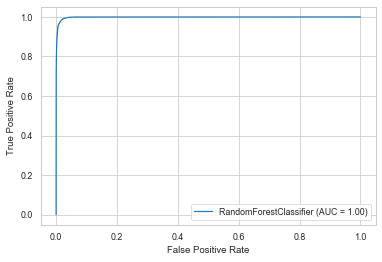

In [187]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [188]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [189]:
rf_model = rf.fit(X_train,y_train)

## Prediction and Recall

### On the train data

In [190]:
y_train_rf_pred = rf_model.predict(X_train)

In [191]:
y_train_rf_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [192]:
y_train_rf_final = pd.DataFrame({'Churn':y_train, 'final_predict':y_train_rf_pred})
y_train_rf_final.head()

,Churn,final_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [193]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_train_rf_final.Churn, y_train_rf_final.final_predict)))

Accuracy : 0.98


In [194]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_rf_final.Churn, y_train_rf_final.final_predict)
confusion_train

array([[17130,   446],
       [  147, 17429]], dtype=int64)

In [195]:
TP = confusion_train[1,1]
FP = confusion_train[0,1]
TN = confusion_train[0,0]
FN = confusion_train[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 17429
True Negative: 17130
False Positive: 446
False Negative: 147


In [196]:
Precision = (confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]))
print('Precision = %0.2f'%Precision)

Recall = (confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))
print('Recall = %0.2f'%Recall)

Precision = 0.98
Recall = 0.99


### On the test data

In [197]:
y_test_rf_pred = rf_model.predict(X_test)

In [198]:
y_test_rf_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [199]:
y_test_rf_final = pd.DataFrame({'Churn':y_test, 'final_predict':y_test_rf_pred})
y_test_rf_final.head()

,Churn,final_predict
88412,1,1
44491,0,0
11260,0,1
81123,0,0
74955,0,0


In [200]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_test_rf_final.Churn, y_test_rf_final.final_predict)))

Accuracy : 0.93


In [201]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_rf_final.Churn, y_test_rf_final.final_predict)
confusion_test

array([[7129,  372],
       [ 213,  521]], dtype=int64)

In [202]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 521
True Negative: 7129
False Positive: 372
False Negative: 213


In [203]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print('Precision = %0.2f'%Precision)

Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print('Recall = %0.2f'%Recall)

Precision = 0.58
Recall = 0.71


In [204]:
tempResult = pd.DataFrame({'Method':['RF without PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result = pd.concat([Result,tempResult])
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909
0,DT without PCA,0.728883,0.433901
0,RF without PCA,0.709809,0.583427


## 2. With PCA
- ### Logistic Regression

In [205]:
from sklearn.decomposition import PCA

In [206]:
pca = PCA(random_state=42)

In [207]:
pca.fit(X_train)

PCA(random_state=42)

In [208]:
pca.components_

array([[ 3.86268875e-02,  9.08489833e-02,  1.41017095e-01, ...,
         1.06676594e-01,  3.92579716e-02,  7.50483284e-02],
       [ 1.39929570e-01,  1.94270170e-01,  1.56970807e-01, ...,
        -4.49683552e-02, -4.25828182e-03,  1.96123193e-01],
       [ 6.68379896e-02,  1.10332208e-01,  7.43344111e-02, ...,
         1.07055613e-01,  2.81611069e-02,  1.01821600e-01],
       ...,
       [ 0.00000000e+00, -5.33404205e-17,  5.79325281e-17, ...,
         1.01985172e-16, -4.50669185e-17,  7.44470721e-02],
       [ 0.00000000e+00,  8.70640114e-17,  1.80504934e-16, ...,
        -7.22579683e-17,  6.30875050e-19,  1.99085182e-01],
       [ 0.00000000e+00, -2.00760579e-16,  1.00853474e-16, ...,
         2.38751834e-17, -4.75776185e-18, -9.04563985e-03]])

Looking at the explained variance ratio for each component

In [209]:
pca.explained_variance_ratio_

array([1.10853607e-01, 9.53718271e-02, 6.57185372e-02, 4.87248210e-02,
       4.45441030e-02, 4.17066438e-02, 3.96324998e-02, 3.34271595e-02,
       2.38275053e-02, 2.04091633e-02, 1.96067502e-02, 1.85263872e-02,
       1.73768730e-02, 1.67716880e-02, 1.57686625e-02, 1.51390594e-02,
       1.38000489e-02, 1.34594366e-02, 1.21647985e-02, 1.18636347e-02,
       1.17363208e-02, 1.07188488e-02, 9.94694946e-03, 9.32456668e-03,
       9.28678074e-03, 8.84830118e-03, 8.53426265e-03, 8.39535669e-03,
       8.11457132e-03, 8.07215545e-03, 7.93896517e-03, 7.65556589e-03,
       7.37021835e-03, 7.03445529e-03, 7.01039955e-03, 6.71446296e-03,
       6.48016757e-03, 6.05017688e-03, 5.94046631e-03, 5.92265055e-03,
       5.69424461e-03, 5.52429629e-03, 5.41208841e-03, 5.08959338e-03,
       4.95851856e-03, 4.84363257e-03, 4.64699725e-03, 4.60695925e-03,
       4.46275927e-03, 4.27875023e-03, 4.23866167e-03, 4.18440460e-03,
       4.06705576e-03, 3.85212284e-03, 3.66692531e-03, 3.60174645e-03,
      

Following it up with a logistic regression model

In [210]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.11085361, 0.20622543, 0.27194397, 0.32066879, 0.3652129 ,
       0.40691954, 0.44655204, 0.4799792 , 0.5038067 , 0.52421587,
       0.54382262, 0.562349  , 0.57972588, 0.59649757, 0.61226623,
       0.62740529, 0.64120534, 0.65466477, 0.66682957, 0.67869321,
       0.69042953, 0.70114838, 0.71109533, 0.72041989, 0.72970667,
       0.73855497, 0.74708924, 0.75548459, 0.76359916, 0.77167132,
       0.77961029, 0.78726585, 0.79463607, 0.80167052, 0.80868092,
       0.81539539, 0.82187555, 0.82792573, 0.8338662 , 0.83978885,
       0.84548309, 0.85100739, 0.85641948, 0.86150907, 0.86646759,
       0.87131122, 0.87595822, 0.88056518, 0.88502794, 0.88930669,
       0.89354535, 0.89772975, 0.90179681, 0.90564893, 0.90931586,
       0.91291761, 0.91651113, 0.92000057, 0.92341111, 0.92676413,
       0.92989876, 0.93292885, 0.93584681, 0.93868297, 0.94142882,
       0.94406484, 0.94666557, 0.94923923, 0.95174914, 0.9542204 ,
       0.95661956, 0.95896342, 0.96123638, 0.96341927, 0.96555

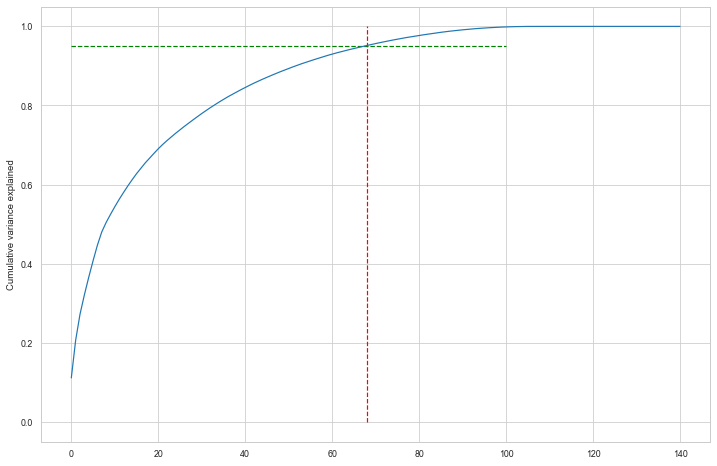

In [211]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=68, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 68 components

In [212]:
from sklearn.decomposition import IncrementalPCA

In [213]:
pca_final = IncrementalPCA(n_components=68)

In [214]:
X_train.shape

(35152, 141)

In [215]:
df_train_pca = pca_final.fit_transform(X_train)

In [216]:
df_train_pca.shape

(35152, 68)

In [217]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [218]:
corrmat.shape

(68, 68)

#### Applying the transformation on the test set

In [219]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8235, 68)

In [220]:
X_test.shape

(8235, 141)

In [221]:
learner_pca = LogisticRegression()

In [222]:
model_pca = learner_pca.fit(df_train_pca, y_train)

### Prediction & Evaluation

### On train data

In [223]:
pred_probs_train = model_pca.predict_proba(df_train_pca)
pred_probs_train

array([[9.05716570e-01, 9.42834299e-02],
       [9.99888048e-01, 1.11951881e-04],
       [9.78458093e-01, 2.15419072e-02],
       ...,
       [3.62459633e-01, 6.37540367e-01],
       [7.47326557e-01, 2.52673443e-01],
       [5.44145873e-02, 9.45585413e-01]])

In [224]:
from sklearn.metrics import roc_curve, auc

In [225]:
fpr, tpr, thresholds =roc_curve(y_train, pred_probs_train[:,1])
roc_auc = auc(fpr, tpr).round(2)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.910000


In [226]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, pred_probs_train[:,1], drop_intermediate = False )

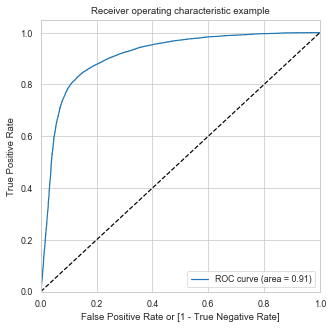

In [227]:
draw_roc(y_train, pred_probs_train[:,1])

In [228]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.91'

In [229]:
y_train_pred_pca_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':pred_probs_train[:,1]})
y_train_pred_pca_final.head()

,Churn,Churn_Prob
0,0,0.094283
1,0,0.000112
2,0,0.021542
3,0,0.004034
4,1,0.798338


In [230]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_pca_final[i]= y_train_pred_pca_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_pca_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.094283,1,0,0,0,0,0,0,0,0,0
1,0,0.000112,1,0,0,0,0,0,0,0,0,0
2,0,0.021542,1,0,0,0,0,0,0,0,0,0
3,0,0.004034,1,0,0,0,0,0,0,0,0,0
4,1,0.798338,1,1,1,1,1,1,1,1,0,0


In [231]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_pca_final.Churn, y_train_pred_pca_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.719788  0.976274  0.463302
0.2   0.2  0.775603  0.954370  0.596837
0.3   0.3  0.807863  0.927572  0.688154
0.4   0.4  0.829882  0.899067  0.760696
0.5   0.5  0.843309  0.865783  0.820835
0.6   0.6  0.848344  0.824249  0.872440
0.7   0.7  0.837876  0.763200  0.912551
0.8   0.8  0.796996  0.649522  0.944470
0.9   0.9  0.629296  0.280667  0.977924


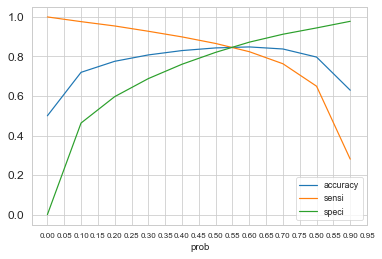

In [232]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step = 0.05), size=8)
plt.yticks(size=12)
plt.show()

In [233]:
y_train_pred_pca_final['final_predicted'] = y_train_pred_pca_final.Churn_Prob.map( lambda x: 1 if x > .55 else 0)

y_train_pred_pca_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.094283,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000112,1,0,0,0,0,0,0,0,0,0,0
2,0,0.021542,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004034,1,0,0,0,0,0,0,0,0,0,0
4,1,0.798338,1,1,1,1,1,1,1,1,0,0,1


In [234]:
metrics.accuracy_score(y_train_pred_pca_final.Churn, y_train_pred_pca_final.final_predicted).round(2)

0.85

In [235]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[14339,  3237],
       [ 3086, 14490]], dtype=int64)

In [236]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 14490
True Negative: 14339
False Positive: 3237
False Negative: 3086


In [237]:
print('Precision = %0.2f'%(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Precision = 0.82


In [238]:
print('Recall = %0.2f'%(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Recall = 0.82


### On test data

In [239]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

pred_probs_test

array([[0.07844416, 0.92155584],
       [0.51233998, 0.48766002],
       [0.11678611, 0.88321389],
       ...,
       [0.45999241, 0.54000759],
       [0.88075878, 0.11924122],
       [0.78329896, 0.21670104]])

In [240]:
y_test_pred_pca_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':pred_probs_test[:,1]})
y_test_pred_pca_final.head()

,Churn,Churn_Prob
88412,1,0.921556
44491,0,0.487660
11260,0,0.883214
81123,0,0.360224
74955,0,0.236875


In [241]:
y_test_pred_pca_final['final_predicted'] = y_test_pred_pca_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_pca_final.head()

,Churn,Churn_Prob,final_predicted
88412,1,0.921556,1
44491,0,0.487660,0
11260,0,0.883214,1
81123,0,0.360224,0
74955,0,0.236875,0


In [242]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_test_pred_pca_final.Churn, y_test_pred_pca_final.final_predicted)))

Accuracy : 0.84


In [243]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_pred_pca_final.Churn, y_test_pred_pca_final.final_predicted)
confusion_test

array([[6312, 1189],
       [ 150,  584]], dtype=int64)

In [244]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 584
True Negative: 6312
False Positive: 1189
False Negative: 150


In [245]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])).round(2)
print('Precision = %0.2f'%Precision)

Precision = 0.33


In [246]:
Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])).round(2)
print('Recall = %0.2f'%Recall)

Recall = 0.80


In [247]:
tempResult = pd.DataFrame({'Method':['Logistic R with PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result = pd.concat([Result,tempResult])
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909
0,DT without PCA,0.728883,0.433901
0,RF without PCA,0.709809,0.583427
0,Logistic R with PCA,0.800000,0.330000


In [248]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

## Decision Tree with PCA

In [249]:
dt_with_pca = DecisionTreeClassifier()

### Hyper-parameter tuning

In [250]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [251]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_with_pca, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [252]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.7min finished


Wall time: 1min 50s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [253]:
grid_search.best_score_

0.8681725079654073

In [254]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [255]:
dt_with_pca = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [256]:
dt_with_pca.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

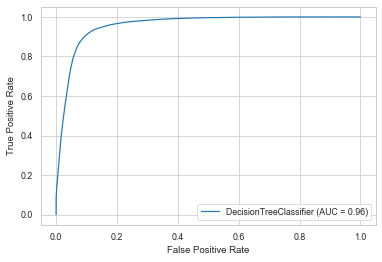

In [257]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

### Prediction & Evaluation

#### On train data

In [258]:
y_train_dt_pca_pred = dt_with_pca.predict(df_train_pca)

In [259]:
y_train_dt_pca_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [260]:
y_train_dt_pca_final = pd.DataFrame({'Churn':y_train, 'final_predicted':y_train_dt_pca_pred})
y_train_dt_pca_final.head()

,Churn,final_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [261]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_train_dt_pca_final.Churn, y_train_dt_pca_final.final_predicted)))

Accuracy : 0.91


In [262]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_dt_pca_final.Churn, y_train_dt_pca_final.final_predicted)
confusion_train

array([[15681,  1895],
       [ 1412, 16164]], dtype=int64)

In [263]:
TP = confusion_train[1,1]
FP = confusion_train[0,1]
TN = confusion_train[0,0]
FN = confusion_train[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 16164
True Negative: 15681
False Positive: 1895
False Negative: 1412


In [264]:
Precision = (confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]))
print('Precision = %0.2f'%Precision)

Precision = 0.90


In [265]:
Recall = (confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))
print('Recall = %0.2f'%Recall)

Recall = 0.92


#### On test data

In [266]:
y_test_dt_pca_pred = dt_with_pca.predict(df_test_pca)

In [267]:
y_test_dt_pca_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [268]:
y_test_dt_pca_final = pd.DataFrame({'Churn':y_test, 'final_predicted':y_test_dt_pca_pred})
y_test_dt_pca_final.head()

,Churn,final_predicted
88412,1,1
44491,0,1
11260,0,0
81123,0,0
74955,0,0


In [269]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_test_dt_pca_final.Churn, y_test_dt_pca_final.final_predicted)))

Accuracy : 0.83


In [270]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_dt_pca_final.Churn, y_test_dt_pca_final.final_predicted)
confusion_test

array([[6324, 1177],
       [ 254,  480]], dtype=int64)

In [271]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 480
True Negative: 6324
False Positive: 1177
False Negative: 254


In [272]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print('Precision = %0.2f'%Precision)

Precision = 0.29


In [273]:
Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print('Recall = %0.2f'%Recall)

Recall = 0.65


In [274]:
tempResult = pd.DataFrame({'Method':['DT with PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result = pd.concat([Result,tempResult])
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909
0,DT without PCA,0.728883,0.433901
0,RF without PCA,0.709809,0.583427
0,Logistic R with PCA,0.800000,0.330000
0,DT with PCA,0.653951,0.289680


## Random forest with PCA

#### Hyper-parameter tuning for the Random Forest

In [275]:
rf = RandomForestClassifier()

In [276]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split':[50,70],
    'criterion': ["entropy", "gini"]    
}

In [277]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [278]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 26.2min finished


Wall time: 28min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [50, 70]},
             scoring='recall', verbose=1)

In [279]:
grid_search.best_score_

0.9164770141101501

In [280]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=50)

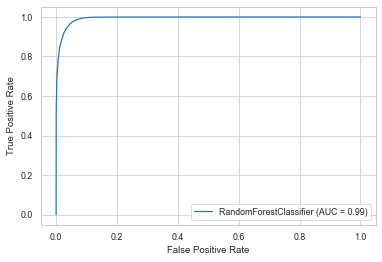

In [281]:
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [282]:
rf_with_pca = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=50)

In [283]:
rf_pca_model = rf_with_pca.fit(df_train_pca,y_train)

## Prediction and Evalution

#### On the train data

In [284]:
y_train_rf_pca_pred = rf_pca_model.predict(df_train_pca)

In [285]:
y_train_rf_pca_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [286]:
y_train_rf_pca_final = pd.DataFrame({'Churn':y_train, 'final_predict':y_train_rf_pca_pred})
y_train_rf_pca_final.head()

,Churn,final_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [287]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_train_rf_pca_final.Churn, y_train_rf_pca_final.final_predict)))

Accuracy : 0.96


In [288]:
# Confusion Matrix
confusion_train = metrics.confusion_matrix(y_train_rf_pca_final.Churn, y_train_rf_pca_final.final_predict)
confusion_train

array([[16736,   840],
       [  563, 17013]], dtype=int64)

In [289]:
TP = confusion_train[1,1]
FP = confusion_train[0,1]
TN = confusion_train[0,0]
FN = confusion_train[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 17013
True Negative: 16736
False Positive: 840
False Negative: 563


In [290]:
Precision = (confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]))
print('Precision = %0.2f'%Precision)

Recall = (confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))
print('Recall = %0.2f'%Recall)

Precision = 0.95
Recall = 0.97


#### On the test data

In [291]:
y_test_rf_pca_pred = rf_pca_model.predict(df_test_pca)

In [292]:
y_test_rf_pca_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [293]:
y_test_rf_pca_final = pd.DataFrame({'Churn':y_test, 'final_predict':y_test_rf_pca_pred})
y_test_rf_pca_final.head()

,Churn,final_predict
88412,1,1
44491,0,0
11260,0,1
81123,0,0
74955,0,0


In [294]:
# Let's check out the overall accuracy
print('Accuracy : %0.2f'%(metrics.accuracy_score(y_test_rf_pca_final.Churn, y_test_rf_pca_final.final_predict)))

Accuracy : 0.90


In [295]:
# Confusion Matrix
confusion_test = metrics.confusion_matrix(y_test_rf_pca_final.Churn, y_test_rf_pca_final.final_predict)
confusion_test

array([[6927,  574],
       [ 264,  470]], dtype=int64)

In [296]:
TP = confusion_test[1,1]
FP = confusion_test[0,1]
TN = confusion_test[0,0]
FN = confusion_test[1,0]

print('True Positive:', TP)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)

True Positive: 470
True Negative: 6927
False Positive: 574
False Negative: 264


In [297]:
Precision = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))
print('Precision = %0.2f'%Precision)

Recall = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
print('Recall = %0.2f'%Recall)

Precision = 0.45
Recall = 0.64


In [298]:
tempResult = pd.DataFrame({'Method':['RF with PCA'], 'Test Recall':[Recall], 'Test Precision ':[Precision ]})
Result = pd.concat([Result,tempResult])
Result

,Method,Test Recall,Test Precision
0,Logistic R without PCA,0.780654,0.306909
0,DT without PCA,0.728883,0.433901
0,RF without PCA,0.709809,0.583427
0,Logistic R with PCA,0.800000,0.330000
0,DT with PCA,0.653951,0.289680
0,RF with PCA,0.640327,0.450192


# Conclusion

On the basis of above result, it is evident that the model Logistic Regression model with Principal Component Analysis (PCA) is giving us the best results so far. So for deployment purpose, we can use Logistic Regression with PCA. 

To determeine the best features, we cannot use PCA, so we will go ahead with Logistic Regression Model without PCA.  

In [299]:
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35152
Model:                            GLM   Df Residuals:                    35139
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14994.
Date:                Tue, 01 Sep 2020   Deviance:                       29987.
Time:                        11:59:49   Pearson chi2:                 8.24e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9430      0.035    -54.881      0.000      -2.012      -1.874
arpu_7                 0.2918      0.018     16.038      0.000       0.256       0.327
onnet_mou_8           -0.0648      0.026     -2.474      0.013      -0.116      -0.013
std_og_mou_8          -0.3983      0.029    -13.556      0.000      -0.456      -0.341
loc_ic_t2m_mou_7       0.2936      0.034      8.747      0.000       0.228       0.359
loc_ic_mou_8          -2.0587      0.049    -42.279      0.000      -2.154      -1.963
std_ic_mou_8          -0.5328      0.033    -16.210      0.000      -0.597      -0.468
spl_ic_mou_8          -0.7282      0.040    -18.201      0.000      -0.807      -0.650
isd_ic_mou_8          -0.1139      0.025     -4.556      0.000      -0.163      -0.065
total_rech_num_8      -0.9129      0.027    -34.326      0.000      -0.965      -0.861
av_rech_amt_data_8    -0.9658      0.030    -32.575      0.000      -1.024      -0.908
aon                   -0.6057      0.019    -32.663      0.000      -0.642      -0.569
sep_vbc_3g            -1.6439      0.143    -11.463      0.000      -1.925      -1.363
======================================================================================
"""

#### Top 10 Variables 

| Variable           | Coeff   |
|--------------------|---------|
|    loc_ic_mou_8    | -2.0587 |
|     sep_vbc_3g     | -1.6439 |
| av_rech_amt_data_8 | -0.9658 |
|  total_rech_num_8  | -0.9129 |
|    spl_ic_mou_8    | -0.7282 |
|         aon        | -0.6057 |
|    std_ic_mou_8    | -0.5328 |
|    std_og_mou_8    | -0.3983 |
|  loc_ic_t2m_mou_7  | 0.2936  |
|       arpu_7       | 0.2918  |

#### Best Features

- Local calls within same telecom circle Incoming Minutes of Usage
- September volume based cost
- Average Recharge Amount Data
- Total Recharge Number
- Special Call Incoming Minutes of Usage
- Age on Network, The number of days the customer is using operator T network
- Std calls incoming Minutes of Usage
- Std calls Outgoing Miniutes of usage
- Local calls incoming from other operator mobile positive
- Average revenue per user positive


#### Business Insights
- Telecom company needs to pay attention to the charges paid by the customer. If the Average revenue coming from a customer is high, then the customer is most likely to churn. 
- If the customer is getting more local calls from other operator, then the customer's contacts are more prone towards other operators. So the customer is also likely to opt for other operators. 
- If the average recharge amount by a customer is low, then the customer is likely not to churn. 
- If the customer is not opting for any specific scheme then the customer is likely not to churn. 
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. They should work on providing better special schemes likely for the customer to spend more and not churn at the same time.

